In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfo = pd.read_csv("parkinsons.data")

In [4]:
dfo.shape

(195, 24)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dfo.drop(['name','status'],axis =1)
y = dfo['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
SS = StandardScaler()
MMS = MinMaxScaler()

In [9]:
x_train = SS.fit_transform(X_train)
x_test = SS.fit_transform(X_test)

# USING RANDOM FOREST 

In [10]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=105)

In [11]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=105)

In [12]:
pred = RFC.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
print(confusion_matrix(y_test,pred))

[[ 8  9]
 [ 0 48]]


In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        17
           1       0.84      1.00      0.91        48

    accuracy                           0.86        65
   macro avg       0.92      0.74      0.78        65
weighted avg       0.88      0.86      0.84        65



In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.8615384615384616

# USING KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [19]:
#GETTING K VALUE WITH LEAST ERRORS
error_rate = []
K = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [20]:
error_rate

[0.1076923076923077,
 0.09230769230769231,
 0.16923076923076924,
 0.15384615384615385,
 0.15384615384615385,
 0.18461538461538463,
 0.13846153846153847,
 0.15384615384615385,
 0.12307692307692308,
 0.13846153846153847,
 0.13846153846153847,
 0.12307692307692308,
 0.16923076923076924,
 0.18461538461538463,
 0.18461538461538463,
 0.18461538461538463,
 0.16923076923076924,
 0.18461538461538463,
 0.18461538461538463,
 0.18461538461538463,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2153846153846154,
 0.2153846153846154,
 0.23076923076923078,
 0.23076923076923078,
 0.24615384615384617,
 0.23076923076923078,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155]

Text(0, 0.5, 'Error Rate')

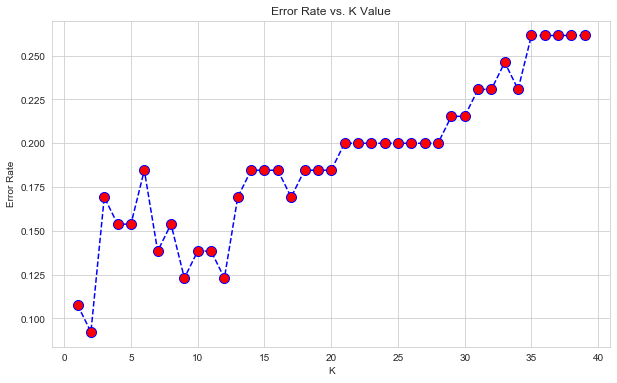

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
predict = knn.predict(x_test)

In [25]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.98      0.88      0.92        48

    accuracy                           0.89        65
   macro avg       0.85      0.91      0.87        65
weighted avg       0.91      0.89      0.90        65



In [26]:
knn.score(x_test,y_test)

0.8923076923076924

In [27]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.88      0.93        48

    accuracy                           0.91        65
   macro avg       0.87      0.94      0.89        65
weighted avg       0.93      0.91      0.91        65



In [29]:
knn.score(x_test,y_test)

0.9076923076923077

# USING LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [31]:
LR.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred1 = LR.predict(x_test)

In [33]:
pred1

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [34]:
x_test

array([[ 0.51263844, -0.09795882,  0.92780154, ...,  0.5567087 ,
         0.03147182, -0.39383713],
       [-1.20339893, -0.81139782, -0.61678308, ..., -0.46547203,
        -1.26213644,  0.2073963 ],
       [ 1.3216278 ,  0.2722459 , -0.59351855, ..., -1.69369456,
        -0.12300943, -1.11650354],
       ...,
       [-1.02340152, -0.86225894, -0.45022788, ..., -0.32734624,
        -0.66177624, -0.12772199],
       [ 1.32153699,  0.52352223, -0.81912514, ...,  1.53338771,
         1.19168218,  0.4455287 ],
       [-0.29580604, -0.51049226, -1.04505911, ..., -0.60728783,
        -0.7346092 , -0.39246474]])

In [35]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.90      0.96      0.93        48

    accuracy                           0.89        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.89      0.89      0.89        65



In [36]:
LR.score(x_test,y_test)

0.8923076923076924

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)


0.8923076923076924

# RUN TIME PREDICTIONS

In [38]:
import glob
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# This is the function to measure voice pitch
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    

    return meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer
def runPCA(df):
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf
# create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
localJitter_list = []
localabsoluteJitter_list = []
rapJitter_list = []
ppq5Jitter_list = []
ddpJitter_list = []
localShimmer_list = []
localdbShimmer_list = []
apq3Shimmer_list = []
aqpq5Shimmer_list = []
apq11Shimmer_list = []
ddaShimmer_list = []

# Go through all the wave files in the folder and measure pitch
for wave_file in glob.glob("audio/*.wav"):
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)
    localJitter_list.append(localJitter)
    localabsoluteJitter_list.append(localabsoluteJitter)
    rapJitter_list.append(rapJitter)
    ppq5Jitter_list.append(ppq5Jitter)
    ddpJitter_list.append(ddpJitter)
    localShimmer_list.append(localShimmer)
    localdbShimmer_list.append(localdbShimmer)
    apq3Shimmer_list.append(apq3Shimmer)
    aqpq5Shimmer_list.append(aqpq5Shimmer)
    apq11Shimmer_list.append(apq11Shimmer)
    ddaShimmer_list.append(ddaShimmer)
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list, localJitter_list, localabsoluteJitter_list, rapJitter_list, ppq5Jitter_list, ddpJitter_list, localShimmer_list, localdbShimmer_list, apq3Shimmer_list, aqpq5Shimmer_list, apq11Shimmer_list, ddaShimmer_list]),
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter', 'rapJitter', 
                                        'ppq5Jitter', 'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer', 
                                        'apq11Shimmer', 'ddaShimmer'])  #add these lists to pandas in the right order
pcaData = runPCA(df)

df = pd.concat([df, pcaData], axis=1)

# Write out the updated dataframe
df.to_csv("processed_results.csv", index=False)

In [39]:
data_p={'MDVP:Fo(Hz)':list(df['meanF0Hz']),'MDVP:Fhi(Hz)':[dfo['MDVP:Fhi(Hz)'].mean()]*len(df),'MDVP:Flo(Hz)':[dfo['MDVP:Flo(Hz)'].mean()]*len(df),'MDVP:Jitter(%)':list(df['localJitter']),
'MDVP:Jitter(Abs)':[dfo['MDVP:Jitter(Abs)'].mean()]*len(df),'MDVP:RAP':list(df['rapJitter']),'MDVP:PPQ':list(df['ppq5Jitter']),'Jitter:DDP':list(df['ddpJitter']),
'MDVP:Shimmer':list(df['localShimmer']),'MDVP:Shimmer(dB)':list(df['localdbShimmer']),'Shimmer:APQ3':list(df['apq3Shimmer']),'Shimmer:APQ5':list(df['apq5Shimmer']),
'MDVP:APQ':list(df['apq11Shimmer']),'Shimmer:DDA':list(df['ddaShimmer']),'NHR':[dfo['NHR'].mean()]*len(df),
'HNR':list(df['HNR']),'RPDE':[dfo['RPDE'].mean()]*len(df),'DFA':[dfo['DFA'].mean()]*len(df),'spread1':[dfo['spread1'].mean()]*len(df),
'spread2':[dfo['spread2'].mean()]*len(df),'D2':[dfo['D2'].mean()]*len(df),'PPE':[dfo['PPE'].mean()]*len(df)}
dfsample = pd.DataFrame.from_dict(data_p)
dfsample.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,113.77680569854286,197.104918,116.324631,0.0014213010729582554,0.000044,0.0007095201587491845,0.0007645157141077805,0.0021285604762475534,0.01787710274672177,0.18570177149979147,...,0.010494519667844397,0.024824846485704,0.024847,26.253282681105546,0.498536,0.718099,-5.684397,0.22651,2.381826,0.206552
1,201.9450715201333,197.104918,116.324631,0.004846807759666541,0.000044,0.0025087786720272213,0.0028426664008764234,0.007526336016081664,0.022721092224691205,0.36600462278007695,...,0.013795520522786762,0.03203357481892713,0.024847,26.031128910959396,0.498536,0.718099,-5.684397,0.22651,2.381826,0.206552
2,111.15389977177607,197.104918,116.324631,0.0019680369258500167,0.000044,0.0010017621778934044,0.0010133799253859255,0.003005286533680213,0.02355521562933281,0.2545799985847508,...,0.013344669375701744,0.030945423592674284,0.024847,24.00527628479194,0.498536,0.718099,-5.684397,0.22651,2.381826,0.206552
3,212.09857905298142,197.104918,116.324631,0.0031189223175170765,0.000044,0.0016619598167540847,0.0018064149400136825,0.004985879450262254,0.02274186063234924,0.2997183985920759,...,0.013489414940305162,0.03154149270422726,0.024847,25.166883394289275,0.498536,0.718099,-5.684397,0.22651,2.381826,0.206552
4,232.57400286508445,197.104918,116.324631,0.0020022482298386506,0.000044,0.001116431883016024,0.0009879185883070157,0.0033492956490480718,0.05132873380984592,0.5148010803409152,...,0.04205492598653385,0.07777413467916469,0.024847,19.77851984358422,0.498536,0.718099,-5.684397,0.22651,2.381826,0.206552


In [40]:
dfsample.dtypes

MDVP:Fo(Hz)          object
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)       object
MDVP:Jitter(Abs)    float64
MDVP:RAP             object
MDVP:PPQ             object
Jitter:DDP           object
MDVP:Shimmer         object
MDVP:Shimmer(dB)     object
Shimmer:APQ3         object
Shimmer:APQ5         object
MDVP:APQ             object
Shimmer:DDA          object
NHR                 float64
HNR                  object
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [41]:
pred1 = LR.predict(dfsample)

In [42]:
pred1

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
for t in pred1:#our output at runtime
    if t==0:
        print(' not parkinson')
    else:
        print('parkinson')

 not parkinson
 not parkinson
 not parkinson
 not parkinson
 not parkinson
 not parkinson
